In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.metrics import mean_squared_error

In [4]:
merged_df = pd.read_csv('../Data/merged.csv')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='mixed', dayfirst=True, errors='coerce')
merged_df = merged_df.sort_values(["Symbol", "Date"]) 

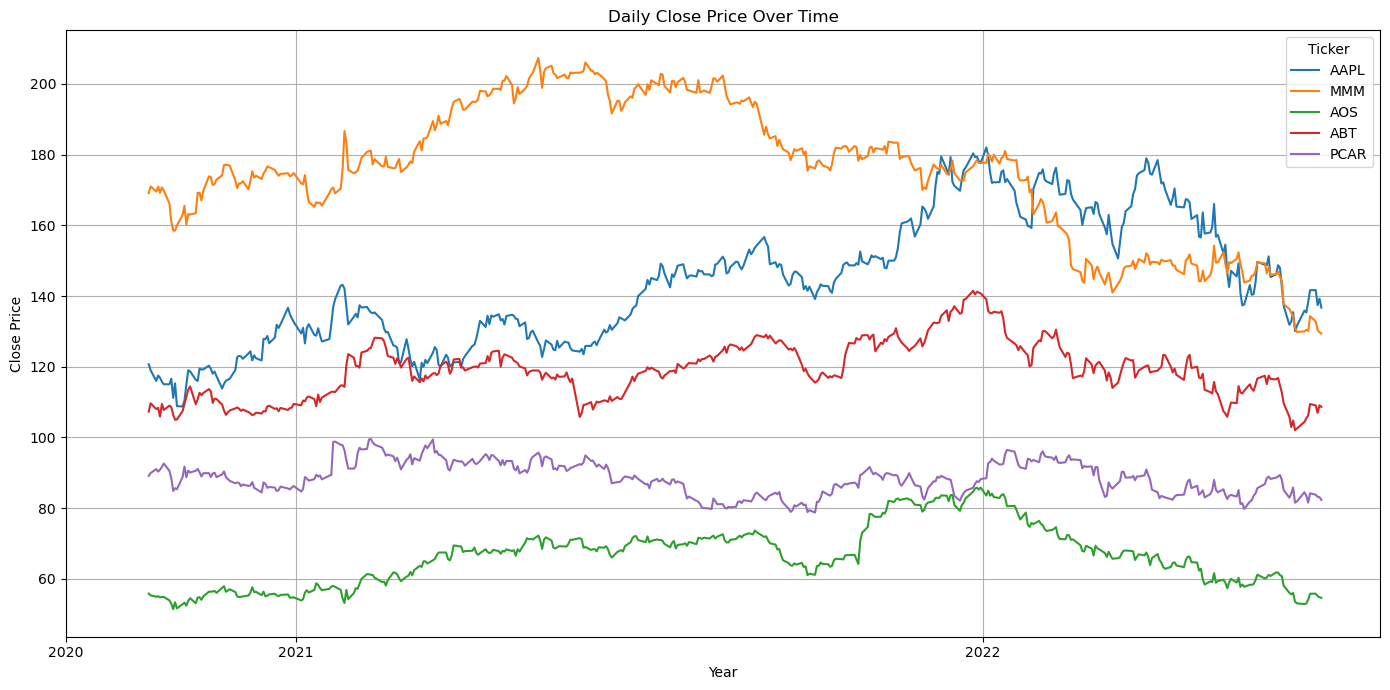

In [5]:
symbols = ['AAPL', 'MMM', 'AOS', 'ABT', 'PCAR']

plt.figure(figsize=(14, 7))

for symbol in symbols:
    data = (
        merged_df.loc[merged_df["Symbol"] == symbol, ["Date", "Close"]]
        .dropna()
        .sort_values("Date")
    )
    plt.plot(
        data["Date"],
        data["Close"],
        label=symbol
    )

years = pd.to_datetime(['2020-09-01', '2021-01-01', '2022-01-01'])
plt.xticks(ticks=years, labels=[str(y.year) for y in years])

plt.title("Daily Close Price Over Time")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.legend(title="Ticker")
plt.grid(True)
plt.tight_layout()
plt.show()

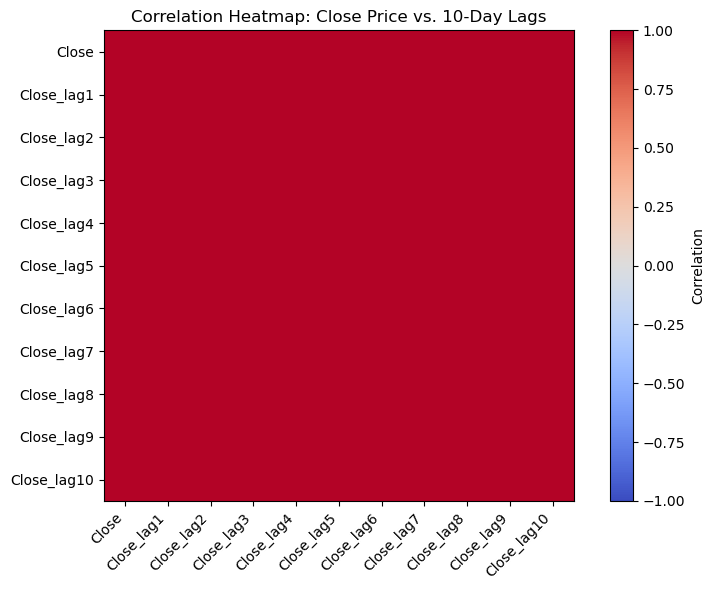

In [6]:
lag_cols = [f"Close_lag{k}" for k in range(1, 11)]
cols_to_corr = ["Close"] + lag_cols
df_lagged = merged_df.dropna(subset=lag_cols)            # drop first 10 rows / symbol

corr_matrix = df_lagged[cols_to_corr].corr()

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Tick labels
ax.set_xticks(range(len(cols_to_corr)))
ax.set_yticks(range(len(cols_to_corr)))
ax.set_xticklabels(cols_to_corr, rotation=45, ha="right")
ax.set_yticklabels(cols_to_corr)

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Correlation")

plt.title("Correlation Heatmap: Close Price vs. 10-Day Lags")
plt.tight_layout()
plt.show()

In [7]:
# Overall RMSE
rmse_all = np.sqrt(
    mean_squared_error(merged_df["Close"], merged_df["Close_lag1"])
)
print(f"Overall RMSE : {rmse_all:.4f}")

# RMSE by symbol
rmse_by_symbol = (
    merged_df
      .groupby("Symbol")
      .apply(lambda g: np.sqrt(mean_squared_error(g["Close"], g["Close_lag1"])))
      .rename("RMSE")
      .reset_index()
)

print("\nRMSE by symbol:")
print(rmse_by_symbol)

Overall RMSE : 7.3431

RMSE by symbol:
    Symbol      RMSE
0        A  2.205950
1      AAL  0.607888
2      AAP  3.616879
3     AAPL  2.684058
4     ABBV  1.729849
..     ...       ...
490    YUM  1.566533
491    ZBH  2.452253
492   ZBRA  9.454716
493   ZION  1.387370
494    ZTS  2.770752

[495 rows x 2 columns]


/tmp/ipykernel_7652/2393452797.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: np.sqrt(mean_squared_error(g["Close"], g["Close_lag1"])))


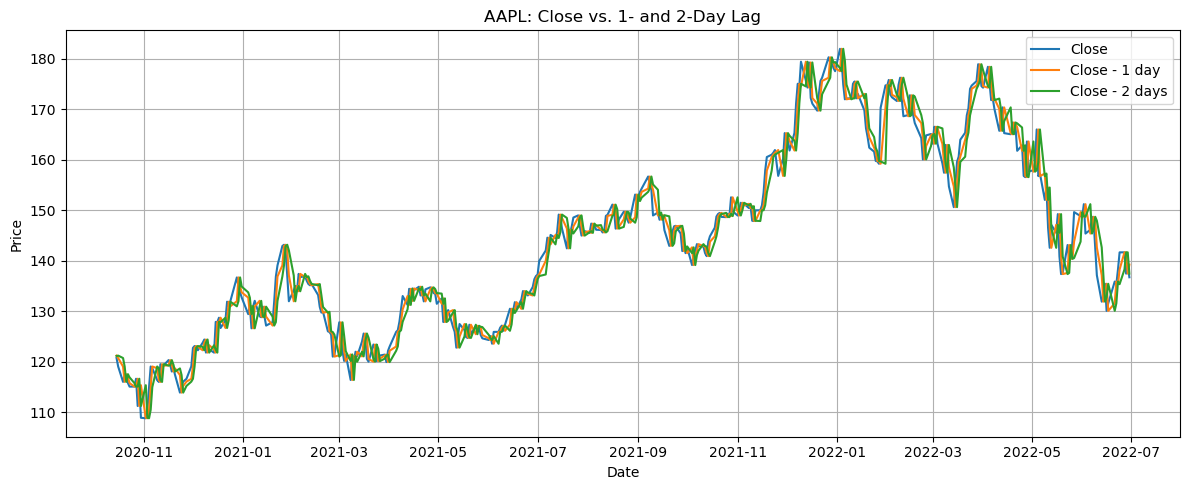

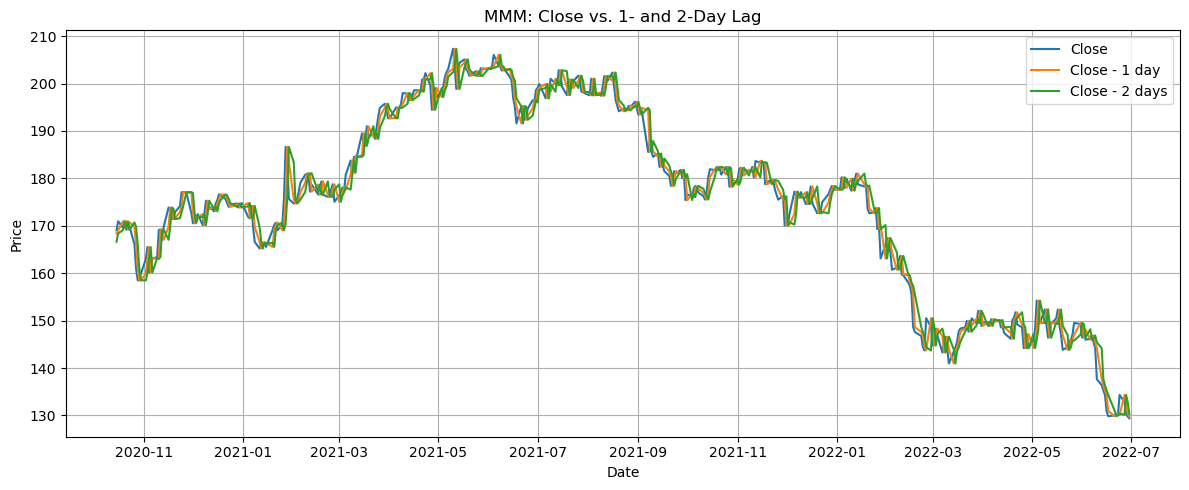

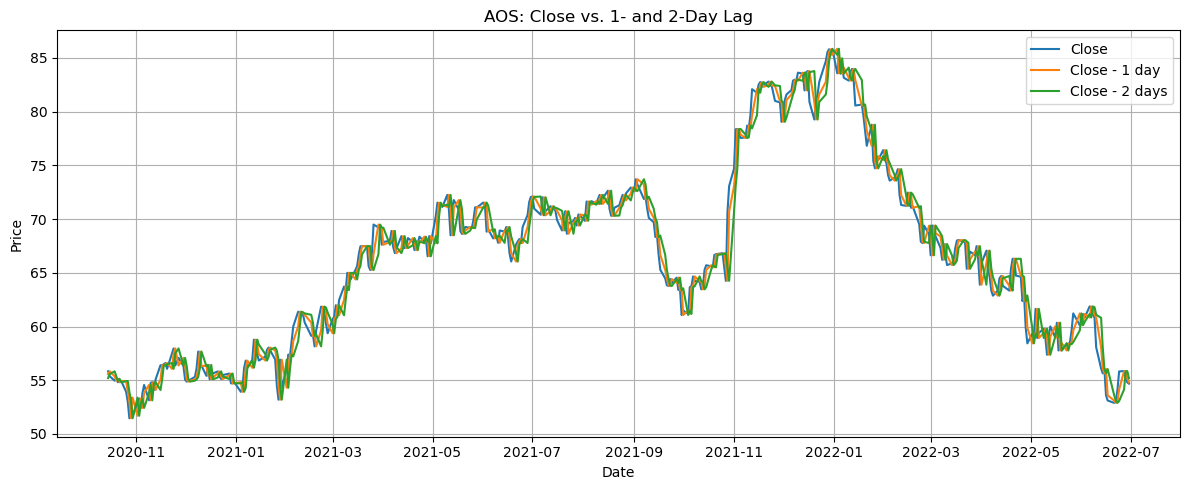

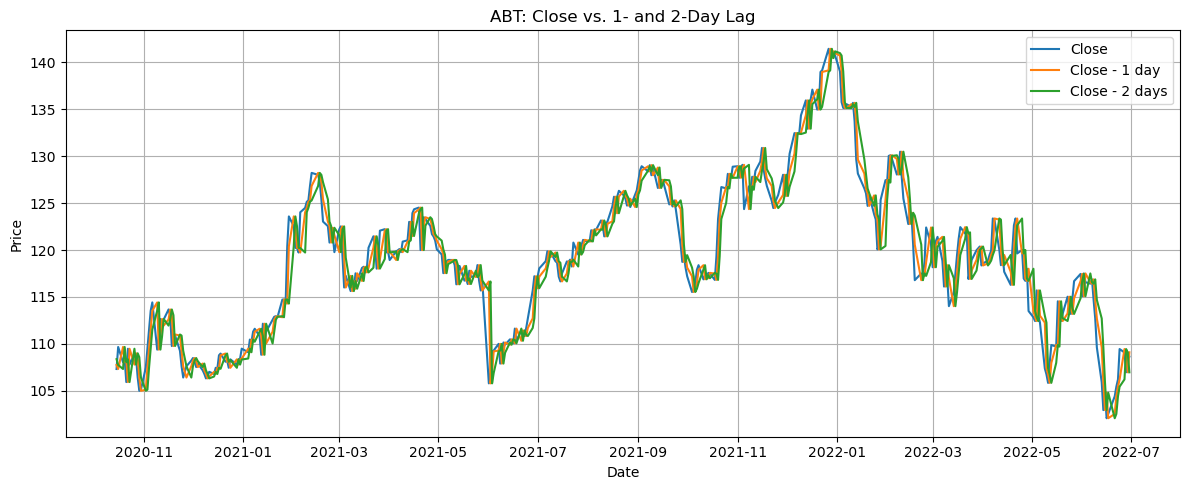

In [8]:
symbols = ['AAPL', 'MMM', 'AOS', 'ABT']

for sym in symbols:
    # slice, drop NaNs from any of the three series, and sort by date
    data = (
        merged_df.loc[merged_df['Symbol'] == sym,
                      ['Date', 'Close', 'Close_lag1', 'Close_lag2']]
        .dropna()
        .sort_values('Date')
    )
    
    # build one figure per symbol
    plt.figure(figsize=(12, 5))
    
    plt.plot(data['Date'], data['Close'],        label='Close')
    plt.plot(data['Date'], data['Close_lag1'],   label='Close - 1 day')
    plt.plot(data['Date'], data['Close_lag2'],   label='Close - 2 days')
    
    plt.title(f'{sym}: Close vs. 1- and 2-Day Lag')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()